In [1]:
#Please execute this cell
import sys;
sys.path.append('../../'); 
import jupman;

# Exam -  Monday 10, June 2019 - solutions

**Scientific Programming - Data Science @ University of Trento**


## [Download exercises and solution](../../_static/datasciprolab-2019-06-10-exam.zip)

## Introduction

* **Taking part to this exam erases any vote you had before**


### Grading


* **Correct implementations**: Correct implementations with the required complexity grant you full grade.
* **Partial implementations**: Partial implementations _might_ still give you a few points. If you just can't solve an exercise,  try to solve it at least for some subcase (i.e. array of fixed size 2) commenting why you did so. 
* **Bonus point**: One bonus point can be earned by writing stylish code. You got style if you:

    - do not infringe the [Commandments](https://datasciprolab.readthedocs.io/en/latest/commandments.html)
    - write [pythonic code](http://docs.python-guide.org/en/latest/writing/style)
    - avoid convoluted code like i.e.

        ```
        if x > 5:
            return True
        else:
            return False
        ```

        when you could write just

        ```
        return x > 5
        ```       

### Valid code

<div class="alert alert-warning">

**WARNING**: MAKE SURE ALL EXERCISE FILES AT LEAST COMPILE !!! 
10 MINS BEFORE THE END OF THE EXAM I WILL ASK YOU TO DO A FINAL CLEAN UP OF THE CODE 
</div>



<div class="alert alert-warning">

**WARNING**: _ONLY_ IMPLEMENTATIONS OF THE PROVIDED FUNCTION SIGNATURES WILL BE EVALUATED !!!!!!!!! <br/>    

</div>


For example, if you are given to implement: 

```python
    def f(x):
        raise Exception("TODO implement me")
```

and you ship this code:

``` python
def my_f(x):
    # a super fast, correct and stylish implementation

def f(x):
    raise Exception("TODO implement me")
```

We will assess only the latter one `f(x)`, and conclude it doesn't work at all :P   !!!!!!!

**Helper functions**

Still, you are allowed to define any extra helper function you might need. If your `f(x)` implementation calls some other function you defined like `my_f` here, it is ok:

```python
# Not called by f, will get ignored:
def my_g(x):
    # bla

# Called by f, will be graded:
def my_f(y,z):
    # bla

def f(x):
    my_f(x,5)
    

```



### How to edit and run

To edit the files, you can use any editor of your choice,  you can find them under _Applications->Programming_:

* **Visual Studio Code**
* Editra is easy to use, you can find it under _Applications->Programming->Editra_.
* Others could be _GEdit_ (simpler), or _PyCharm_ (more complex).

To run the tests, use **the Terminal** which can be found in _Accessories -> Terminal_ 



<div class="alert alert-info">

**IMPORTANT**: Pay close attention to the comments of the functions.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ modify function signatures! Just provide the implementation.
</div>

<div class="alert alert-warning">

**WARNING**: <i>DON'T</i> change the existing test methods, just add new ones !!!  You can add as many as you want.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ create other files. If you still do it, they won't be evaluated.
</div>




### Debugging 

If you need to print some debugging information, you are allowed to put extra <code>print</code>
    statements in the function bodies.


<div class="alert alert-warning">

**WARNING:** even if print statements are allowed, be careful with prints that might
     break your function! 
</div>


For example, avoid stuff like this: 

```python
x = 0
print(1/x)
```


### What to do

1) Download  `datasciprolab-2019-06-10-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
datasciprolab-2019-06-10-FIRSTNAME-LASTNAME-ID
    |-jupman.py
    |-sciprog.py
    |-other stuff ...
    |-exams
        |-2019-06-10
            |- exam-2019-06-10-exercise.ipynb
            |- stack_exercise.py
            |- stack_test.py
            |- tree_exercise.py
            |- tree_test.py
            
            
```

2) Rename `datasciprolab-2019-06-10-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `datasciprolab-2019-06-10-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually
 


## Part A

Open Jupyter and start editing this notebook `exam-2019-06-10-exercise.ipynb`


### A1 ITEA real estate

You will now analyze public real estates in Trentino, which are managed by ITEA agency. Every real estate has a type, and we will find the type distribution.

Data provider: [ITEA - dati.trentino.it](https://dati.trentino.it/dataset/patrimonio-immobiliare)

A function `load_itea` is given to load the dataset (you don't need to implement it):

In [2]:
def load_itea():
    """Loads file data and RETURN a list of dictionaries with the stop times
    """
    
    import csv
    with open('data/itea.csv', newline='',  encoding='latin-1',) as csvfile:
        reader = csv.DictReader(csvfile,  delimiter=';')
        lst = []
        for d in reader:
            lst.append(d)
    return lst


itea = load_itea()


<div class="alert alert-warning">

**IMPORTANT**: look at the dataset by yourself !

Here we show only first 5 rows, but to get a clear picture of the dataset you need to study it a bit by yourself

</div>


In [3]:
itea[:5]

[{'Comune': "BASELGA DI PINE'",
  'Frazione': '',
  'Indirizzo': "Codice unita': 30100049",
  'Proprietà': 'ITEA',
  'Tipologia': 'ALTRO'},
 {'Comune': 'TRENTO',
  'Frazione': '',
  'Indirizzo': "Codice unita': 43100011",
  'Proprietà': 'ITEA',
  'Tipologia': 'ALLOGGIO'},
 {'Comune': 'TRENTO',
  'Frazione': '',
  'Indirizzo': "Codice unita': 43100002",
  'Proprietà': 'ITEA',
  'Tipologia': 'ALLOGGIO'},
 {'Comune': 'TRENTO',
  'Frazione': '',
  'Indirizzo': 'VIALE DELLE ROBINIE 26',
  'Proprietà': 'ITEA',
  'Tipologia': 'ALLOGGIO'},
 {'Comune': 'TRENTO',
  'Frazione': '',
  'Indirizzo': 'VIALE DELLE ROBINIE 26',
  'Proprietà': 'ITEA',
  'Tipologia': 'ALLOGGIO'}]

### A1.1 calc_types_hist

Implement function `calc_types_hist` to extract the types (`'Tipologia'`) of ITEA real estate and RETURN a histogram which associates to each type its frequency.

- You will discover there are three types of apartments: 'ALLOGGIO', 'ALLOGGIO  DUPLEX' and 'ALLOGGIO MONOLOCALE'. In the resulting histogram you must place only the key 'ALLOGGIO' which will be the sum of all of them.
- Same goes for 'POSTO MACCHINA' (parking lot): there are many of them ( 'POSTO MACCHINA COMUNE ESTERNO',
 'POSTO MACCHINA COMUNE INTERNO', 'POSTO MACCHINA ESTERNO', 'POSTO MACCHINA INTERNO', 'POSTO MACCHINA SOTTO TETTOIA') but we only want to see 'POSTO MACCHINA' as key with the sum of all of them.
 NOTE: Please don't use 5 ifs, try to come up with some generic code to catch all these cases ..)

In [4]:
def calc_types_hist(db):
    #jupman-raise
    
    tipologie = {}
    for diz in db:
        if diz['Tipologia'].startswith('ALLOGGIO'):
            chiave = 'ALLOGGIO'
        elif diz['Tipologia'].startswith('POSTO MACCHINA'):
            chiave = 'POSTO MACCHINA'
        else: 
            chiave = diz['Tipologia']
            
        if chiave in tipologie:            
            tipologie[chiave] += 1
        else:
            tipologie[chiave] = 1
        
    return tipologie
    #/jupman-raise
    
calc_types_hist(itea)

{'ALLOGGIO': 10778,
 'ALTRO': 64,
 'AMBULATORIO': 1,
 'ARCHIVIO ITEA': 10,
 'AREA URBANA': 6,
 'ASILO': 1,
 'CABINA ELETTRICA': 41,
 'CANTINA': 40,
 'CASERMA': 2,
 'CENTRALE TERMICA': 4,
 'GARAGE': 2221,
 'LABORATORIO PER ARTI E MESTIERI': 3,
 'LEGNAIA': 3,
 'LOCALE COMUNE': 28,
 'MAGAZZINO': 143,
 'MUSEO': 1,
 'NEGOZIO': 139,
 'POSTO MACCHINA': 3147,
 'RUDERE': 1,
 'SALA / ATTIVITA SOCIALI': 45,
 'SOFFITTA': 3,
 'TETTOIA': 2,
 'UFFICIO': 29}


    
### A1.2 calc_types_series

Takes a dictionary histogram and RETURN a list of tuples containing key/value pairs, sorted from most frequent iyems to least frequent.

**HINT**: if you don't remember how to sort by an element of a tuple, look at [this example](https://datasciprolab.readthedocs.io/en/latest/exercises/visualization/visualization-solution.html#indegree-per-node-sorted) and also in python documentation about sorting.

In [5]:
def calc_types_series(hist):
    #jupman-raise
    ret = []
    
    for key in hist:
        ret.append((key, hist[key]))
    
    ret.sort(key=lambda c: c[1],reverse=True)
    return ret[:10]
    #/jupman-raise

tipologie = calc_types_series(calc_types_hist(itea))

tipologie

[('ALLOGGIO', 10778),
 ('POSTO MACCHINA', 3147),
 ('GARAGE', 2221),
 ('MAGAZZINO', 143),
 ('NEGOZIO', 139),
 ('ALTRO', 64),
 ('SALA / ATTIVITA SOCIALI', 45),
 ('CABINA ELETTRICA', 41),
 ('CANTINA', 40),
 ('UFFICIO', 29)]

### A1.3 Real estates plot

Once you obtained the series as above, plot the first 10 most frequent items, in decreasing order.

- please pay attention to plot title, width and height, axis labels. Everything MUST display in a readable way.

- try also to print nice the labels, if they are too long / overlap like for 'SALA / ATTIVITA SOCIALI' put carriage returns in a generic way.

In [6]:
# write here


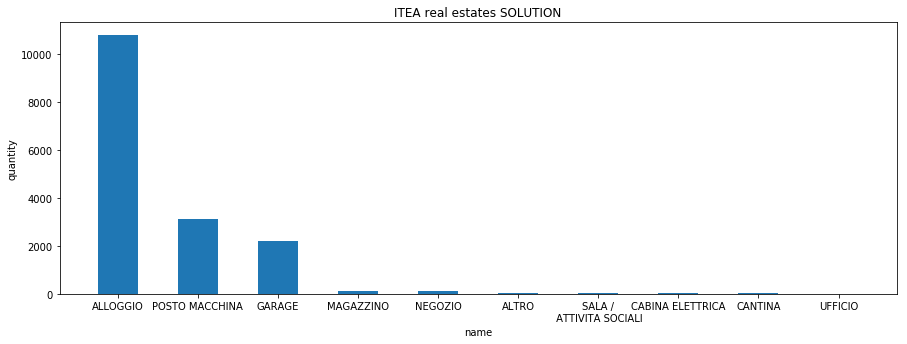

In [7]:
# SOLUTION

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


xs = np.arange(len(tipologie))

xs_labels = [t[0].replace('/', '/\n') for t in tipologie]

ys = [t[1] for t in tipologie]

fig = plt.figure(figsize=(15,5))

plt.bar(xs, ys, 0.5, align='center')

plt.title("ITEA real estates SOLUTION")
plt.xticks(xs, xs_labels)

plt.xlabel('name')
plt.ylabel('quantity')

plt.show()

### A2 Air quality

You will now analyze air_quality in Trentino. You are given a dataset which records various pollutants  ('Inquinante') at various stations (`'Stazione'`) in Trentino. Pollutants values can be `'PM10'`, `'Biossido Zolfo'`, and a few others. Each station records some set of pollutants. For each pollutant values are recorded (`'Valore'`) 24 times per day.

Data provider: [PAT Ag. Provinciale per la protezione dell'Ambiente - dati.trentino.it](https://dati.trentino.it/dataset/qualita-dell-aria-rilevazioni-delle-stazioni-monitoraggio) 

A function `load_air_quality` is given to load the dataset (you don't need to implement it):

In [8]:
def load_air_quality():
    """Loads file data and RETURN a list of dictionaries with the stop times
    """
    
    import csv
    with open('data/air-quality.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.DictReader(csvfile)
        lst = []
        for d in reader:
            lst.append(d)
    return lst


air_quality = load_air_quality()


<div class="alert alert-warning">

**IMPORTANT 1**: look at the dataset by yourself !

Here we show only first 5 rows, but to get a clear picture of the dataset you need to study it a bit by yourself

</div>


<div class="alert alert-warning">

**IMPORTANT 2**: EVERY field is a STRING, including 'Valore' !

</div>


In [9]:
air_quality[:5]

[{'Data': '2019-05-04',
  'Inquinante': 'PM10',
  'Ora': '1',
  'Stazione': 'Parco S. Chiara',
  'Unità di misura': 'µg/mc',
  'Valore': '17'},
 {'Data': '2019-05-04',
  'Inquinante': 'PM10',
  'Ora': '2',
  'Stazione': 'Parco S. Chiara',
  'Unità di misura': 'µg/mc',
  'Valore': '19'},
 {'Data': '2019-05-04',
  'Inquinante': 'PM10',
  'Ora': '3',
  'Stazione': 'Parco S. Chiara',
  'Unità di misura': 'µg/mc',
  'Valore': '17'},
 {'Data': '2019-05-04',
  'Inquinante': 'PM10',
  'Ora': '4',
  'Stazione': 'Parco S. Chiara',
  'Unità di misura': 'µg/mc',
  'Valore': '15'},
 {'Data': '2019-05-04',
  'Inquinante': 'PM10',
  'Ora': '5',
  'Stazione': 'Parco S. Chiara',
  'Unità di misura': 'µg/mc',
  'Valore': '13'}]


Now implement the following function:

In [10]:
def calc_avg_pollution(db):
    """ RETURN a dictionary containing two elements tuples as keys: 
        -  first tuple element is the station ('Stazione'),
        - second tuple element  is the name of a pollutant ('Inquinante')
        
        To each tuple key, you must associate as value the average for that station 
        _and_ pollutant over all days.
    
    """
    #jupman-raise
    ret = {}
    counts = {}
    for diz in db:
        t = (diz['Stazione'], diz['Inquinante'])
        if t in ret:
            ret[t] += float(diz['Valore'])
            counts[t] += 1
        else:
            ret[t] = float(diz['Valore'])
            counts[t] = 1
            
        
    for t in ret:
        ret[t] /= counts[t]
    return ret
    #/jupman-raise

calc_avg_pollution(air_quality)

{('A22 (Avio)', 'Biossido di Azoto'): 33.0650406504065,
 ('A22 (Avio)', 'Ossido di Carbonio'): 0.4228848821081822,
 ('A22 (Avio)', 'PM10'): 9.651821862348179,
 ('Borgo Valsugana', 'Biossido di Azoto'): 15.73806275579809,
 ('Borgo Valsugana', 'Ozono'): 58.599730458221025,
 ('Borgo Valsugana', 'PM10'): 11.819407008086253,
 ('Borgo Valsugana', 'PM2.5'): 7.413746630727763,
 ('Monte Gaza', 'Biossido di Azoto'): 4.34412955465587,
 ('Monte Gaza', 'Ozono'): 99.0858310626703,
 ('Monte Gaza', 'PM10'): 7.794520547945205,
 ('Parco S. Chiara', 'Biossido Zolfo'): 1.2918918918918918,
 ('Parco S. Chiara', 'Biossido di Azoto'): 20.828146143437078,
 ('Parco S. Chiara', 'Ozono'): 66.69541778975741,
 ('Parco S. Chiara', 'PM10'): 11.385752688172044,
 ('Parco S. Chiara', 'PM2.5'): 7.9471544715447155,
 ('Piana Rotaliana', 'Biossido di Azoto'): 15.170068027210885,
 ('Piana Rotaliana', 'Ozono'): 67.03633916554509,
 ('Piana Rotaliana', 'PM10'): 9.728744939271255,
 ('Riva del Garda', 'Biossido di Azoto'): 17.125

## Part B

### B1 Theory

Let `L` be a list containing `n` lists, each of them of size `m`. Return the computational complexity of function `fun()` with respect to `n` and `m`.

**Write the solution in separate `theory.txt` file**

```python
def fun(L):
    for r1 in L:
        for r2 in L:
            if r1 != r2 and sum(r1) == sum(r2):
                print("Similar:")
                print(r1)
                print(r2)
```

**ANSWER**: $\Theta(m \cdot n^2 ) $

### B2 WStack


**Using a text editor**, open file `stack_exercise.py`. You will find a `WStack` class skeleton which represents a simple stack that can only contain integers.

#### B2.1 implement class WStack

Fill in missing methods in class `WStack` in the order they are presented  so to have a `.weight()` method that returns the total sum of integers in the stack in `O(1)` time. 



Example:

In [11]:
from stack_solution import *

In [12]:
s = WStack()

In [13]:
print(s)

WStack: weight=0 elements=[]


In [14]:
s.push(7)

In [15]:
print(s)

WStack: weight=7 elements=[7]


In [16]:
s.push(4)

In [17]:
print(s)

WStack: weight=11 elements=[7, 4]


In [18]:
s.push(2)

In [19]:
s.pop()

2

In [20]:
print(s)

WStack: weight=11 elements=[7, 4]


#### B2.2 accumulate

Implement function `accumulate`:

```python
def accumulate(stack1, stack2, min_amount):
    """ Pushes on stack2 elements taken from stack1 until the weight of
        stack2 is equal or exceeds the given min_amount

        - if the given min_amount cannot possibly be reached because 
          stack1 has not enough weight, raises early ValueError without 
          changing stack1.
        - DO NOT access internal fields of stacks, only use class methods.
        - MUST perform in O(n) where n is the size of stack1
        - NOTE: this function is defined *outside* the class !
    """
```
**Testing**: `python -m unittest stacks_test.AccumulateTest`

**Example**:

In [21]:


s1 = WStack()


print(s1)


WStack: weight=0 elements=[]


In [22]:
s1.push(2)
s1.push(9)
s1.push(5)
s1.push(3)


In [23]:
print(s1)

WStack: weight=19 elements=[2, 9, 5, 3]


In [24]:
s2 = WStack()
print(s2)

WStack: weight=0 elements=[]


In [25]:
s2.push(1)
s2.push(7)
s2.push(4)


In [26]:
print(s2)


WStack: weight=12 elements=[1, 7, 4]


In [27]:
# attempts to reach in s2 a weight of at least 17

In [28]:
accumulate(s1,s2,17)

In [29]:
print(s1)

WStack: weight=11 elements=[2, 9]


Two top elements were taken from s1 and now s2 has a weight of 20, which is >= 17

In [30]:
print(s2)   

WStack: weight=20 elements=[1, 7, 4, 3, 5]


### B3 GenericTree

Open file `tree.py` in a text editor and read following instructions.

#### B3.1  is_triangle

A _triangle_ is a node which has _exactly_ two children. 

Let's see some example: 


```
         a
       /   \
      /     \
     b ----- c
    /|\     /  
   d-e-f   g
          / \
         h---i
            / 
           l
```

The tree above can also be represented like this:

``` 
    a
    ├b
    |├d
    |├e
    |└f
    └c
     └g
      ├h
      └i
       └l
```    


- node `a` is a triangle because has _exactly_ two children `b` and `c`, note it doesn't matter if `b` or `c` have children)
- `b` is _not_ a triangle (has 3 children)
- `c` and `i` are _not_ triangles (have only 1 child)
- `g` is a triangle as it has _exactly_ two children `h` and `i`
- `d`, `e`, `f`, `h` and `l` are not triangles, because they have zero children


Now implement this method:

```python
    def is_triangle(self, elems):
        """ RETURN True if this node is a triangle matching the data  
            given by list elems. 
            
            In order to match:
            - first list item must be equal to this node data
            - second list item must be equal to this node first child data
            - third list item must be equal to this node second child data

            - if elems has less than three elements, raises ValueError
        """
```

**Testing**: `python -m unittest tree_test.IsTriangleTest`

**Examples**: 


In [31]:
from tree_test import gt

In [32]:

# this is the tree from the example above

tb = gt('b', gt('d', gt('e'), gt('f')))
tg = gt('g', gt('h'), gt('i', gt('l')))
ta = gt('a', tb, gt('c', tg))

ta.is_triangle(['a','b','c'])    

True

In [33]:
ta.is_triangle(['b','c','a'])    

False

In [34]:
tb.is_triangle(['b','d','e'])    

False

In [35]:
tg.is_triangle(['g','h','i']) 

True

In [36]:
tg.is_triangle(['g','i','h'])

False

#### B3.2 has_triangle

Implement this method: 


```python

    def has_triangle(self, elems):
        """ RETURN True if this node *or one of its descendants* is a triangle
            matching given elems. Otherwise, return False.

            - a recursive solution is acceptable
        """
```

**Testing**: `python -m unittest tree_test.HasTriangleTest`

**Examples**:



In [37]:

# example tree seen at the beginning

tb = gt('b', gt('d', gt('e'), gt('f')))
tg = gt('g', gt('h'), gt('i', gt('l')))
tc = gt('c', tg)
ta = gt('a', tb, tc)


ta.has_triangle(['a','b','c'])


True

In [38]:
ta.has_triangle(['a','c','b'])    


False

In [39]:
ta.has_triangle(['b','c','a'])    


False

In [40]:
tb.is_triangle(['b','d','e'])   


False

In [41]:
tg.has_triangle(['g','h','i'])  


True

In [42]:
tc.has_triangle(['g','h','i'])  # check recursion 


True

In [43]:
ta.has_triangle(['g','h','i'])  # check recursion     

True

In [44]:
#ignore this cell
import stack_solution
import stack_test
jupman.run(stack_test)
import tree_solution
import tree_test
jupman.run(tree_test)


..............
----------------------------------------------------------------------
Ran 14 tests in 0.007s

OK
...................
----------------------------------------------------------------------
Ran 19 tests in 0.009s

OK
